In [16]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

In [7]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

zero_padding_array = np.zeros((500,100,600,1))

In [8]:
training_data.shape

(500, 100, 1000, 1)

In [9]:
training_labels.shape

(500, 100, 100, 1)

In [10]:
zero_padding_array.shape

(500, 100, 600, 1)

In [11]:
print(training_data.shape)
training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size+1:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)

model = Sequential()

# Layer 1
model.add(Conv2D(64, input_shape=(100,1600,1), kernel_size=(2,1), strides=(1,1), padding='same'))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 2
model.add(Conv2D(32, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 3
model.add(Conv2D(16, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 4
model.add(Conv2D(1, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

model.summary()

(500, 100, 1000, 1)
(500, 100, 1600, 1)
(500, 100, 100, 1)
X_train.shape :  (425, 100, 1600, 1)
X_test.shape :  (74, 100, 1600, 1)
Y_train.shape :  (425, 100, 100, 1)
Y_test.shape :  (74, 100, 100, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 1600, 64)     192       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 1600, 64)     256       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 1600, 64)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 800, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 800, 32)      4128      
___________________________________________________

In [15]:
# (4) Compile
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [16]:
# (5) Train
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=6, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 74 samples
Epoch 1/6
425/425 [==============================] - 103s 243ms/step - loss: 0.2765 - accuracy: 0.6464 - val_loss: 0.2311 - val_accuracy: 0.6492
Epoch 2/6
425/425 [==============================] - 103s 242ms/step - loss: 0.2247 - accuracy: 0.6456 - val_loss: 0.2382 - val_accuracy: 0.6492
Epoch 3/6
425/425 [==============================] - 102s 240ms/step - loss: 0.2120 - accuracy: 0.6461 - val_loss: 0.2283 - val_accuracy: 0.6492
Epoch 4/6
425/425 [==============================] - 102s 240ms/step - loss: 0.2103 - accuracy: 0.6463 - val_loss: 0.2233 - val_accuracy: 0.6492
Epoch 5/6
425/425 [==============================] - 102s 241ms/step - loss: 0.2101 - accuracy: 0.6463 - val_loss: 0.2246 - val_accuracy: 0.6492
Epoch 6/6
425/425 [==============================] - 102s 241ms/step - loss: 0.2095 - accuracy: 0.6463 - val_loss: 0.2232 - val_accuracy: 0.6492


In [17]:
train_result = model.evaluate(X_train, Y_train)
test_result = model.evaluate(X_test, Y_test)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

74/74 [==============================] - 5s 73ms/step
Train Acc:  [0.21997677911730373, 0.64715576171875]
Test Acc:  [0.22322214374671112, 0.6491594314575195]


## Load Model

In [12]:
model = keras.models.load_model('./output/CNN_model_03.h5')

## X_train plot

In [13]:
X_train_results = model.predict(X_train)

In [22]:
train_show_index_1 = 0
train_show_index_2 = 2

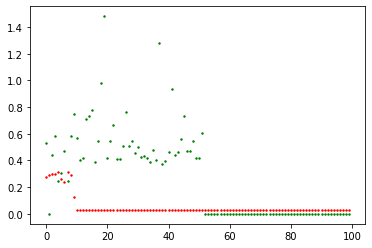

In [23]:
plt.scatter(range(X_train_results[train_show_index_1][train_show_index_2].shape[0]), X_train_results[train_show_index_1][train_show_index_2], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index_1][train_show_index_2].shape[0]), Y_train[train_show_index_1][train_show_index_2], c='g', s = 2)

## X_test plot

In [24]:
X_test_results = model.predict(X_test)

In [27]:
test_show_index_1 = 0
test_show_index_2 = 2

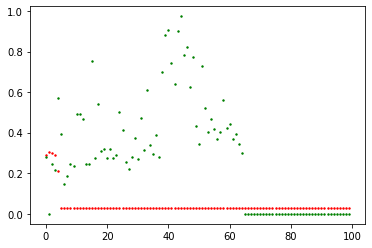

In [28]:
plt.scatter(range(X_test_results[test_show_index_1][test_show_index_2].shape[0]), X_test_results[test_show_index_1][test_show_index_2], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index_1][test_show_index_2].shape[0]), Y_test[test_show_index_1][test_show_index_2], c='g', s = 2)